In [1]:
using CSV

function dist(x,y)
    (x-y)^2
end

function get_min(m₀, m₁, m₂, i, j)
    if m₀ < m₁
        m₀ < m₂ && return i-1, j, m₀
        return i-1, j-1, m₂
    else
        m₁ < m₂ && i, j-1, m₁
        return i-1, j-1, m₂
    end
end

function spring(x, y, ϵ)
    pathes = []

    Tx = length(x)
    Ty = length(y)

    C = zeros(Float64, (Tx, Ty))
    B = ones(Int64, (Tx, Ty, 2))
    S = ones(Int64, (Tx, Ty))

    C[1,1] = dist(x[1], x[2])

    for j in 2:Ty
        C[1, j] = C[1, j-1] + dist(x[1], y[j])
        S[1, j] = S[1, j-1]
        B[1, j, :] = [1, j-1]
    end

    for i in 2:Tx
        C[i, 1] = dist(x[i], y[1])
        S[i, 1] = i
        B[i, 1, :] = [1, 1]

        for j in 2:Ty
            pi, pj, m = get_min(C[i-1, j],
                                C[i, j-1],
                                C[i-1, j-1],
                                i, j)
            C[i,j] = dist(x[i], y[j]) + m
            B[i,j,:] = [pi, pj]
            S[i,j] = S[pi, pj]
        end

        imin = argmin(C[1:i, end])
        dmin = C[imin, end]
        # dmin > ϵ && continue

        for j in 2:Ty
            C[i,j] < dmin && S[i,j] < imin && @goto duplicate_range
        end

        path = []
        push!(path, [imin, Ty])
        tempᵢ = imin
        tempⱼ = Ty

        #println(B[imin, Ty, :])
        while (B[tempᵢ, tempⱼ, 1] != 1 || B[tempᵢ, tempⱼ, 2] != 1)
            #println(B[tempᵢ, tempⱼ, :])
            push!(path, B[tempᵢ, tempⱼ, :])
            tempᵢ, tempⱼ = B[tempᵢ, tempⱼ, :]
        end

        # TODO enumerate で書き直す
        C[S[:, end].<= imin, end] .= Inf
        push!(pathes, path)

        @label duplicate_range
    end
    return pathes
end


spring (generic function with 1 method)

In [2]:
df = CSV.read("./data.csv", header=false, delim=",")
data = df[2]
x = data[1:4:1000]
y = data[1000:4:end]
ϵ = 80

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:2
└ @ Core In[2]:2


80

In [3]:
pathes = spring(x, y, ϵ);

In [4]:
using Plots
gr()

Plots.GRBackend()

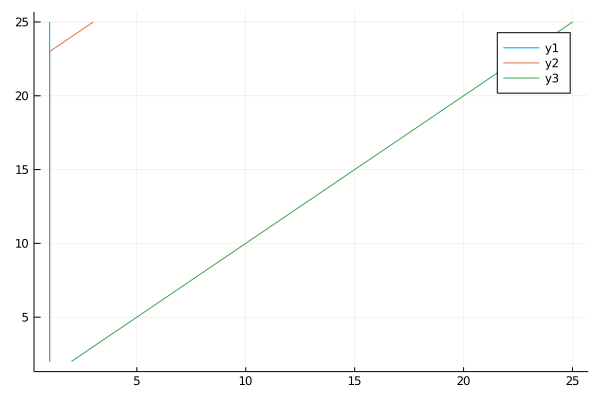

In [5]:
temp_path = hcat(pathes[1]...);
plot(temp_path[1, :], temp_path[2, :]);

temp_path = hcat(pathes[2]...);
plot!(temp_path[1, :], temp_path[2, :])

temp_path = hcat(pathes[3]...);
plot!(temp_path[1, :], temp_path[2, :])

In [13]:
temp_path = hcat(pathes[1]...);
temp = plot(temp_path[1, :], temp_path[2, :]);

for path in pathes[2:end]
    temp_path = hcat(path...);
    temp = plot!(temp_path[1, :], temp_path[2, :])
end

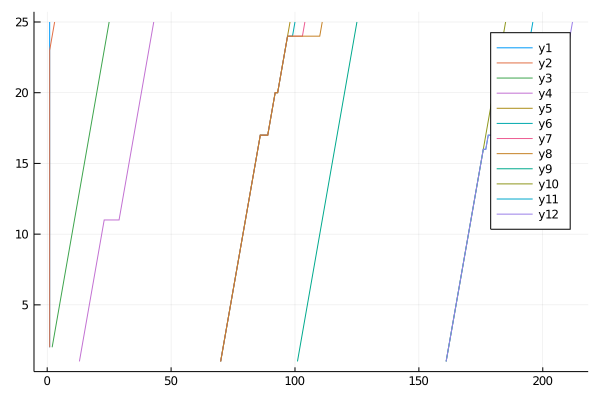

In [14]:
temp

In [10]:
length(pathes)

12